# Final Projct
### Leeza Sergeeva
### Thomas Boisvert

In [1]:
#from google.colab import drive
#drive.mount('/content/drive/')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [3]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.tree import export_text
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
import sklearn.metrics
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.decomposition import PCA

NOTE: The project can be done in groups of up to 4 people.

1. Find a data set. See the Data Sources Announcement for suggestions.

2. Understand the data and identify a question that lends itself to exploration via a machine learning model. 

3. Build a model to address the question in 2. Be sure to clearly identify the type of problem (regression or classification; supervised or unsupervised), the model/algorithm you used and why, what pre-processing or cleaning you did before building the model, what features you used or didn't use, etc.

4. Summarize the modeling results and how they address your question in 2.

Deliverables:

1. The data set you used in csv format

2. A well commented and easy to read jupyter notebook including all the steps above: cleaning, processing, feature engineering, model building.

3. A high-level overview of the project and process including:

a)  A  description of you data, the variables/features, and the question being addressed.

b)  A description of your analysis: what were you trying to do and why, and how did you achieve it.

c) A conclusion: What insight(s) into the original question did the model/analysis provide. Are there new questions or future work that the       analysis suggests? Were the results surprising or expected?

4. If you are working in a group: A statement confirming that all group members have contributed significantly, and approximately equally, to the submitted work.

The deliverables should take one of the following forms:

1. Markdown embedded in the jupyter notebook. OR

2. Powerpoint slides accompanying the jupyter notebook.

This dataset is taken from https://www.kaggle.com/datasets/rajyellow46/wine-quality.

#### Data Set Information:

The dataset was downloaded from the UCI Machine Learning Repository.

The two datasets are related to red and white variants of the Portuguese "Vinho Verde" wine. The reference [Cortez et al., 2009]. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

Two datasets were combined and few values were randomly removed.

#### Attribute Information:

For more information, read [Cortez et al., 2009].
Input variables (based on physicochemical tests):

1 - fixed acidity

2 - volatile acidity

3 - citric acid

4 - residual sugar

5 - chlorides

6 - free sulfur dioxide

7 - total sulfur dioxide

8 - density

9 - pH

10 - sulphates

11 - alcohol

Output variable (based on sensory data):

12 - quality (score between 0 and 10)

#### Acknowledgements:
P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis.
Modeling wine preferences by data mining from physicochemical properties. In Decision Support Systems, Elsevier, 47(4):547-553, 2009.

### Importing and Cleaning Data

In [4]:
winequality=pd.read_csv('data/winequalityN.csv')
winequality.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


Check data for missing values and clean the table up.

In [5]:
winequality.isna().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [6]:
winequality=winequality.dropna()

In [7]:
winequality.isna().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [8]:
winequality.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000
mean,7.217755,0.339589,0.318758,5.443958,0.056056,30.516865,115.694492,0.994698,3.218332,0.531150,10.492825,5.818505
std,1.297913,0.164639,0.145252,4.756852,0.035076,17.758815,56.526736,0.003001,0.160650,0.148913,1.193128,0.873286
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992330,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.997000,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


Checking the correlation between attributes

In [9]:
winequality_all=winequality.drop('type',1)
winequality_all.head()

<ipython-input-9-97fccd1f6cd9>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  winequality_all=winequality.drop('type',1)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


### Correlation Between Variables

Compute the z score of each value in the sample, relative to the sample mean and standard deviation and filter out outliers.

In [10]:
z = np.abs(stats.zscore(winequality_all))

In [11]:
winequality_no_outliers = winequality_all[(z < 3).all(axis=1)]
winequality_no_outliers.shape

(5955, 12)

<AxesSubplot:>

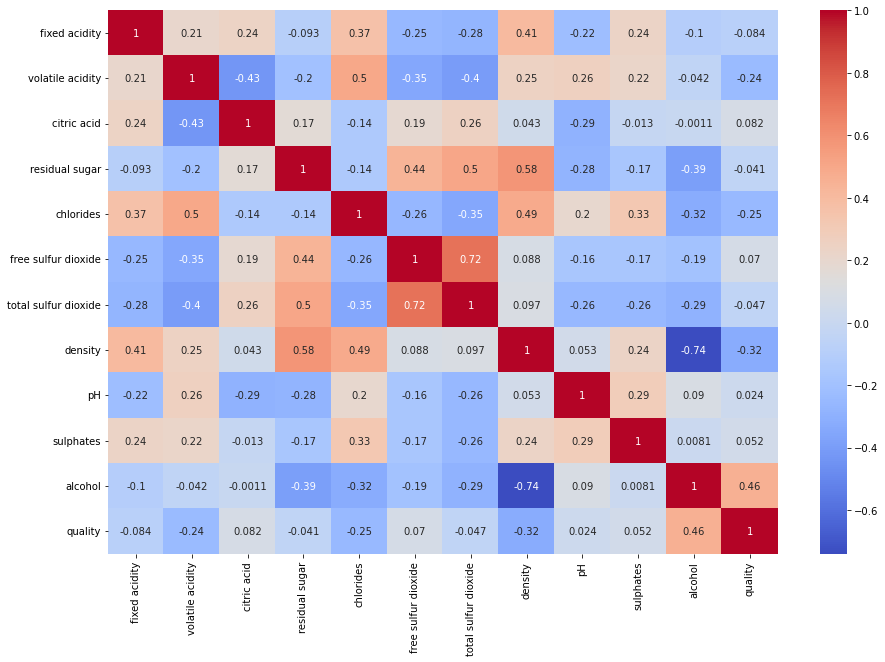

In [12]:
plt.subplots(figsize=(15, 10))
sns.heatmap(winequality_no_outliers.corr(), annot = True, cmap = 'coolwarm')

In [13]:
winequality_no_outliers['quality'].value_counts()

6    2620
5    1948
7    1022
8     183
4     182
Name: quality, dtype: int64

In [14]:
winequality_all['quality'].value_counts()

6    2820
5    2128
7    1074
4     214
8     192
3      30
9       5
Name: quality, dtype: int64

In [15]:
winequality['type'].value_counts()

white    4870
red      1593
Name: type, dtype: int64

There are a lot more white wines than red ones in the data set.

# Is it RED or WHITE wine? Which model can predict if wine is red or white? - Leeza Sergeeva
### Supervised Classification Problem

### Split data into training and validation sets, and scale data.

Split data into testing and training sets, scale testing and training sets. 70% of the data will be used for training of the models and 30% of the data will be used for validation of the models. 

In [16]:
# convert type column into numerical column separating white and red wine. Red = 1. White = 0.
winequality['red_wine'] = np.where(winequality['type'] == 'red', 1,0)
winequality_red = winequality.drop('type', 1)
winequality_red.head()

<ipython-input-16-63659313c2e5>:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  winequality_red = winequality.drop('type', 1)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,red_wine
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0


In [17]:
X = winequality_red.drop('red_wine', 1)
y = winequality_red['red_wine']

<ipython-input-17-58fce93724f6>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = winequality_red.drop('red_wine', 1)


In [18]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=5)

In [19]:
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.fit_transform(X_test)

In [20]:
np.allclose(np.mean(X_train_scaled,axis=0),0),np.allclose(np.std(X_train_scaled,axis=0),1)

(True, True)

### k-nearest neighbors

#### Cross Validation to find the bet k value

In [21]:
cvres=[]
for i in range(1,20):
    clf = KNeighborsClassifier(n_neighbors=i)
    nn = cross_validate(clf, X_train_scaled, y_train, cv=5, scoring='accuracy')
    cvres.append(nn['test_score'].mean())

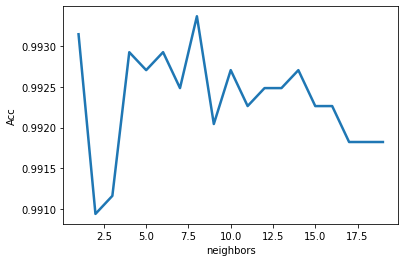

In [22]:
plt.plot(list(range(1,20)),cvres[0:19],linewidth=2.5)
plt.xlabel('neighbors')
plt.ylabel('Acc')
plt.show()

Max k = 8

In [23]:
mod = KNeighborsClassifier(n_neighbors=8)
nb8=mod.fit(X_train_scaled,y_train)

In [24]:
np.round(accuracy_score(nb8.predict(X_test_scaled),y_test),3)

0.994

In [25]:
print(classification_report(y_test,nb8.predict(X_test_scaled)))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1451
           1       0.99      0.98      0.99       488

    accuracy                           0.99      1939
   macro avg       0.99      0.99      0.99      1939
weighted avg       0.99      0.99      0.99      1939



### Bagging

In [26]:
regr = BaggingRegressor(base_estimator=DecisionTreeRegressor(),n_estimators=100,oob_score=True,random_state=5).fit(X_train_scaled, y_train)

In [27]:
print("R^2 is {}".format(regr.score(X_test_scaled,y_test)),":",":", "MSE is {}".format(mean_squared_error(regr.predict(X_test_scaled),y_test)))

R^2 is 0.9528558755468113 : : MSE is 0.008878900534324096


In [28]:
regr.oob_score_

0.9531712665622825

In [29]:
num_trees=np.linspace(50,2000,10, endpoint=False)

In [30]:
oob_res=[]
for trs in num_trees:
    res = BaggingRegressor(base_estimator=DecisionTreeRegressor(),n_estimators=int(trs),oob_score=True,random_state=5).fit(X_train_scaled, y_train)
    oob_res.append(res.oob_score_)

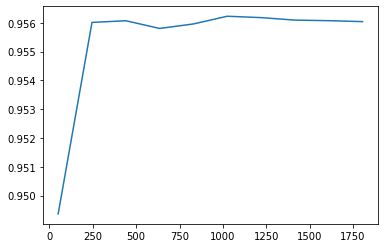

In [31]:
plt.plot(num_trees,oob_res)

In [32]:
num_trees[np.argmax(oob_res)]

1025.0

In [33]:
opt_trs=int(num_trees[np.argmax(oob_res)])

In [34]:
regr = BaggingRegressor(base_estimator=DecisionTreeRegressor(),n_estimators=opt_trs,random_state=5).fit(X_train_scaled, y_train)

In [35]:
np.round(regr.score(X_test_scaled,y_test),3)

0.954

### Random Forest Regression

In [36]:
rf = RandomForestRegressor(n_estimators=300,max_features='sqrt',random_state=5).fit(X_train_scaled,y_train)

In [37]:
rf.score(X_test_scaled,y_test)

0.9647034374270878

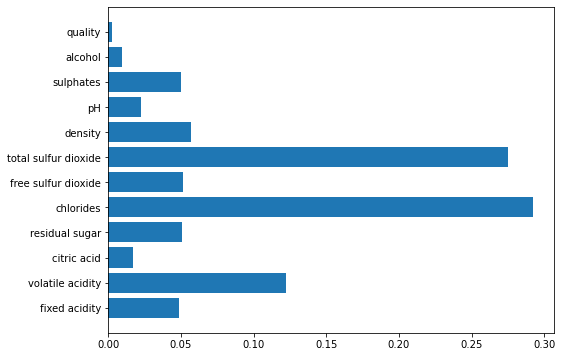

In [38]:
plt.figure(figsize=(8,6))
nfeat=X.shape[1]
plt.barh(np.arange(nfeat),rf.feature_importances_,align='center')
plt.yticks(np.arange(nfeat),list(X.columns))
plt.ylim(-1,nfeat)
plt.show()

### Gradient Boosting Regression

In [39]:
breg = GradientBoostingRegressor(random_state=5,learning_rate=0.1,n_estimators=500,max_depth=2).fit(X_train_scaled,y_train)

In [40]:
breg.score(X_test_scaled,y_test)

0.9321698440654015

In [41]:
parameters = {'learning_rate':[0.1,0.01], 'n_estimators':[200,300,400,500,600],'max_depth':[1,2,3,4,5]}

In [42]:
bmod = GradientBoostingRegressor(random_state=5)

In [43]:
# this step is taking forever to run
boost_regr = GridSearchCV(bmod, parameters)
boost_regr.fit(X_train_scaled, y_train)

GridSearchCV(estimator=GradientBoostingRegressor(random_state=5),
             param_grid={'learning_rate': [0.1, 0.01],
                         'max_depth': [1, 2, 3, 4, 5],
                         'n_estimators': [200, 300, 400, 500, 600]})

In [44]:
df=pd.DataFrame.from_dict(boost_regr.cv_results_)

In [45]:
df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.360238,0.012607,0.001574,0.000180,0.1,1,200,"{'learning_rate': 0.1, 'max_depth': 1, 'n_esti...",0.869815,0.884887,0.849392,0.876985,0.860088,0.868234,0.012472,45
1,0.534330,0.009000,0.002022,0.000365,0.1,1,300,"{'learning_rate': 0.1, 'max_depth': 1, 'n_esti...",0.876732,0.889033,0.856966,0.882458,0.866581,0.874354,0.011398,43
2,0.704991,0.018445,0.002232,0.000280,0.1,1,400,"{'learning_rate': 0.1, 'max_depth': 1, 'n_esti...",0.881440,0.892113,0.862259,0.886398,0.871135,0.878669,0.010716,42
3,0.867692,0.014522,0.002669,0.000211,0.1,1,500,"{'learning_rate': 0.1, 'max_depth': 1, 'n_esti...",0.884861,0.895016,0.866080,0.888815,0.874519,0.881858,0.010328,41
4,0.996886,0.006089,0.003119,0.000396,0.1,1,600,"{'learning_rate': 0.1, 'max_depth': 1, 'n_esti...",0.887584,0.896969,0.868983,0.890929,0.876838,0.884261,0.010055,40


In [46]:
df[df['mean_test_score']==df['mean_test_score'].max()]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
15,1.203557,0.006961,0.002762,0.000367,0.1,4,200,"{'learning_rate': 0.1, 'max_depth': 4, 'n_esti...",0.962969,0.955294,0.926003,0.95774,0.953467,0.951095,0.012946,1


In [47]:
best_breg = GradientBoostingRegressor(random_state=5,learning_rate=0.1,n_estimators=200,max_depth=4).fit(X_train_scaled,y_train)

In [48]:
np.round(best_breg.score(X_test_scaled,y_test),3)

0.946

### Logistic Regression

In [49]:
lm = LogisticRegression(random_state=5).fit(X_train_scaled, y_train)

In [50]:
print(classification_report(y_test,lm.predict(X_test_scaled)))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1451
           1       0.99      0.98      0.99       488

    accuracy                           0.99      1939
   macro avg       0.99      0.99      0.99      1939
weighted avg       0.99      0.99      0.99      1939



In [51]:
print('R^2: %.3f' % lm.score(X_test_scaled,y_test))
print('Precision: %.3f' % sklearn.metrics.precision_score(y_test, lm.predict(X_test_scaled)))
print('Recall: %.3f' % sklearn.metrics.recall_score(y_test, lm.predict(X_test_scaled)))
print('Accuracy: %.3f' % sklearn.metrics.accuracy_score(y_test, lm.predict(X_test_scaled)))

R^2: 0.993
Precision: 0.990
Recall: 0.982
Accuracy: 0.993


In [52]:
precision, recall, thresholds = precision_recall_curve(y_test,lm.predict_proba(X_test_scaled)[:,1])

In [53]:
max(thresholds)

0.9999999908492677

In [54]:
pt=np.argmin(np.abs(thresholds-0.5))

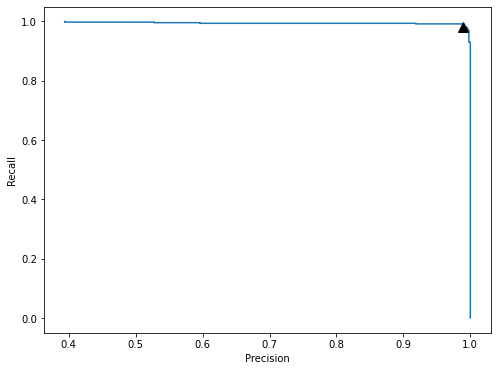

In [55]:
plt.figure(figsize=(8,6))
plt.plot(precision,recall,label='rf')
plt.plot(precision[pt],recall[pt],'^',c='k',markersize=10)
plt.xlabel('Precision')
plt.ylabel('Recall')
plt.show()

### Random Forest Classifier

In [56]:
rfc = RandomForestClassifier(n_estimators=400,max_features='sqrt',random_state=5).fit(X_train_scaled,y_train)

In [57]:
accuracy_score(rfc.predict(X_test_scaled),y_test)

0.9927797833935018

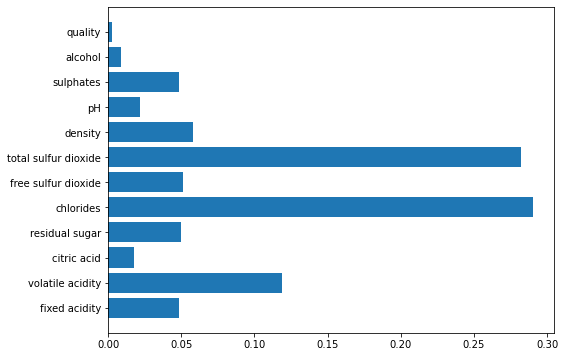

In [58]:
plt.figure(figsize=(8,6))
nfeat=X.shape[1]
plt.barh(np.arange(nfeat),rfc.feature_importances_,align='center')
plt.yticks(np.arange(nfeat),list(X.columns))
plt.ylim(-1,nfeat)
plt.show()

We can see that there are three major variables (total sulfur dioxide, chlorides and volatile acidity) that contribute to random forest regresion model.

In [59]:
print(classification_report(y_test,rfc.predict(X_test_scaled)))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1451
           1       1.00      0.98      0.99       488

    accuracy                           0.99      1939
   macro avg       0.99      0.99      0.99      1939
weighted avg       0.99      0.99      0.99      1939



In [60]:
print('R^2: %.3f' % rfc.score(X_test_scaled,y_test))
print('Precision: %.3f' % sklearn.metrics.precision_score(y_test, rfc.predict(X_test_scaled)))
print('Recall: %.3f' % sklearn.metrics.recall_score(y_test, rfc.predict(X_test_scaled)))
print('Accuracy: %.3f' % sklearn.metrics.accuracy_score(y_test, rfc.predict(X_test_scaled)))

R^2: 0.993
Precision: 0.996
Recall: 0.975
Accuracy: 0.993


In [61]:
precision, recall, thresholds = precision_recall_curve(y_test,rfc.predict_proba(X_test_scaled)[:,1])

In [62]:
max(thresholds)

1.0

In [63]:
pt=np.argmin(np.abs(thresholds-0.5))

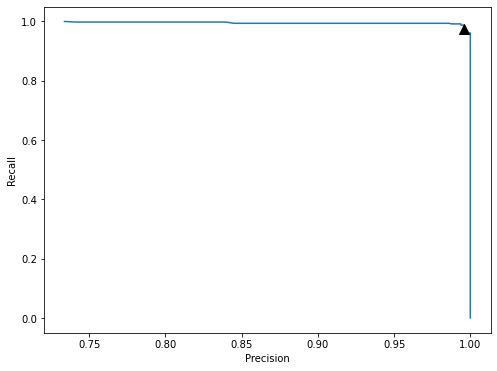

In [64]:
plt.figure(figsize=(8,6))
plt.plot(precision,recall,label='rfc')
plt.plot(precision[pt],recall[pt],'^',c='k',markersize=10)
plt.xlabel('Precision')
plt.ylabel('Recall')
plt.show()

### Gradient Boosting Classifier

In [65]:
gbc = GradientBoostingClassifier(random_state=5,learning_rate=0.1,n_estimators=200,max_depth=4).fit(X_train_scaled,y_train)

In [66]:
print('Precision: %.3f' % sklearn.metrics.precision_score(y_test, gbc.predict(X_test_scaled)))
print('Recall: %.3f' % sklearn.metrics.recall_score(y_test, gbc.predict(X_test_scaled)))
print('Accuracy: %.3f' % sklearn.metrics.accuracy_score(y_test, gbc.predict(X_test_scaled)))

Precision: 0.985
Recall: 0.969
Accuracy: 0.989


In [67]:
precision, recall, thresholds = precision_recall_curve(y_test,gbc.predict_proba(X_test_scaled)[:,1])

In [68]:
max(thresholds)

0.9999995474207156

In [69]:
pt=np.argmin(np.abs(thresholds-0.5))

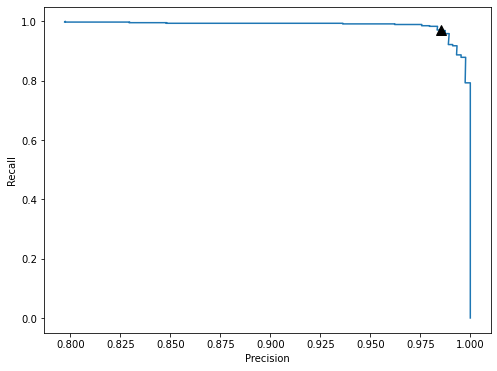

In [70]:
plt.figure(figsize=(8,6))
plt.plot(precision,recall,label='rf')
plt.plot(precision[pt],recall[pt],'^',c='k',markersize=10)
plt.xlabel('Precision')
plt.ylabel('Recall')
plt.show()

### Best Classifier = Logistic Regression and Random Forest Classifier
Logistic Regression and Random Forest Classifier both outperformed the Gradient Boosting Classifier in predicting red wine. 

Logistic Regression Stats are:

> R^2: 0.993; Precision: 0.990; Recall: 0.982; Accuracy: 0.993

Random Forest Classifier Stats are:

> R^2: 0.993; Precision: 0.996; Recall: 0.975; Accuracy: 0.993

We can see that both models had same R^2 values and Accuacy. However Logistic Regression had better recall, while Random Forest Classifier had slightly better Precision.

### Principal Component Analysis

Before Scaling data for PCA

In [71]:
pca_w = PCA(2).fit_transform(winequality_red)

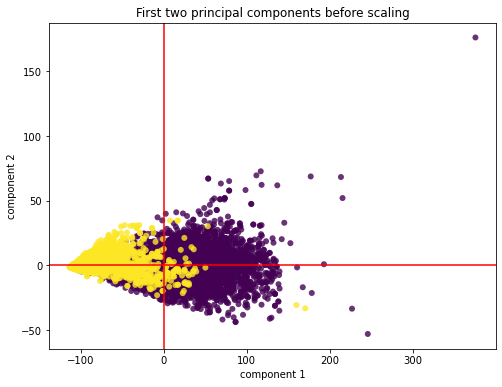

In [72]:
fig,ax=plt.subplots(figsize=(8,6))
plt.scatter(pca_w[:, 0], pca_w[:, 1],
            c=winequality_red.red_wine, edgecolor='none',alpha=0.8)
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.axhline(y=0, color='r', linestyle='-')
plt.axvline(x=0, color='r', linestyle='-')
plt.title("First two principal components before scaling")
plt.show()

After Scaling data for PCA

In [73]:
pca_scaled = StandardScaler().fit_transform(winequality_red)

In [74]:
pca = PCA(2).fit_transform(pca_scaled)

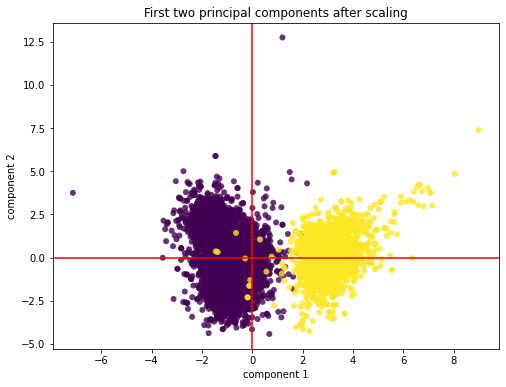

In [75]:
fig,ax=plt.subplots(figsize=(8,6))

xx=pca[:,0]
yy=pca[:,1]

plt.scatter(xx, yy,
            c=winequality_red.red_wine, edgecolor='none',alpha=0.8)
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.axhline(y=0, color='r', linestyle='-')
plt.axvline(x=0, color='r', linestyle='-')
plt.title("First two principal components after scaling")

plt.show()

In [76]:
winequality_red_group = winequality_red.groupby(winequality_red.red_wine).mean()
winequality_red_group

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
red_wine,,,,,,,,,,,,
0,6.855123,0.278071,0.334199,6.394343,0.045771,35.317146,138.340144,0.994026,3.188154,0.489700,10.516772,5.878029
1,8.326365,0.527659,0.271551,2.538512,0.087497,15.841808,46.463905,0.996752,3.310590,0.657866,10.419617,5.636535


### PCA Conclusion

Scaling data helps a lot when dealing with PCA. Since the dataset contained a lot more white wines than red, scaling was necessary to improve our model. From PCA analysis we can note that we have two groups of wine. White wine is colored purple (on the left) and red wine is colored yellow (on the right). White wines have on average lower fixed and volatile acidity, chlorides and sulphates than red wines, but have higher residual sugar as well as free and total sulfur dioxides. It's spmewhat challenging interpreting this PCA plot, however we can note that data contains couple outliers from both red and white wines. 

# Is this wine a good quality? Which model can best predict wine quality? - Thomas Boisvert
### Regression Analysis

In [77]:
# use the data without outliers that was processed based on the z-score values.
winequality_no_outliers.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
5,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6


In [78]:
winequality_no_outliers.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
5,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6


In [79]:
# Define new x & y
X = winequality_no_outliers.drop('quality', 1)
y = winequality_no_outliers['quality']

<ipython-input-79-a365abfa3658>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = winequality_no_outliers.drop('quality', 1)


In [80]:
# Split into training and test data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=5)

In [81]:
from sklearn.preprocessing import StandardScaler

In [82]:
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.fit_transform(X_test)

In [83]:
np.allclose(np.mean(X_train_scaled,axis=0),0),np.allclose(np.std(X_train_scaled,axis=0),1)

(True, True)

### K-Nearest Neighbors

#### Cross Validation to find the best k value

In [84]:
cvres=[]
for i in range(1,20):
    clf = KNeighborsClassifier(n_neighbors=i)
    nn = cross_validate(clf, X_train_scaled, y_train, cv=5, scoring='accuracy')
    cvres.append(nn['test_score'].mean())

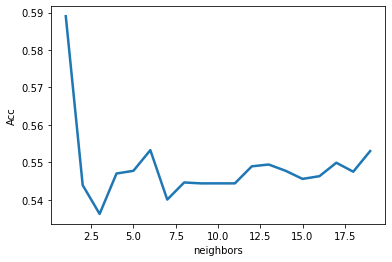

In [85]:
plt.plot(list(range(1,20)),cvres[0:19],linewidth=2.5)
plt.xlabel('neighbors')
plt.ylabel('Acc')
plt.show()

Max K = 1

In [86]:
mod = KNeighborsClassifier(n_neighbors=1)
nb1=mod.fit(X_train_scaled,y_train)

In [87]:
np.round(accuracy_score(nb1.predict(X_test_scaled),y_test),3)

0.619

In [88]:
print(classification_report(y_test,nb1.predict(X_test_scaled)))

              precision    recall  f1-score   support

           4       0.34      0.25      0.29        61
           5       0.64      0.68      0.66       576
           6       0.64      0.63      0.63       785
           7       0.58      0.58      0.58       313
           8       0.46      0.52      0.49        52

    accuracy                           0.62      1787
   macro avg       0.53      0.53      0.53      1787
weighted avg       0.62      0.62      0.62      1787



### Logistic Regression

In [89]:
lm = LogisticRegression(random_state=5).fit(X_train_scaled, y_train)

In [90]:
accuracy_score(lm.predict(X_test_scaled),y_test)

0.5416899832120873

In [91]:
pd.crosstab(lm.predict(X_test_scaled),y_test)

quality,4,5,6,7,8
row_0,,,,,
5,40,336,168,23,2
6,21,237,570,228,37
7,0,3,47,62,13


### Decision Tree Classifier

In [92]:
Tclf = DecisionTreeClassifier(max_depth=4,random_state=0).fit(X_train,y_train)

In [93]:
Tclf.score(X_test,y_test)

0.527700055959709

### Random Forest

In [94]:
from sklearn.ensemble import RandomForestClassifier

In [95]:
rf = RandomForestClassifier(n_estimators=400,max_features='sqrt',random_state=5).fit(X_train,y_train)

In [96]:
print("Accuracy now is {}".format(rf.score(X_test,y_test)))

Accuracy now is 0.6888640179071068


By comparing the methods we have collected for measuring wine quality against one another, it would seem that the Random Forest model would be the most accurate at predicting this.